In [5]:
import os
from dotenv import load_dotenv, find_dotenv
from langchain_openai import AzureOpenAIEmbeddings
from langchain.chat_models import AzureChatOpenAI
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import TextLoader, DirectoryLoader,  PyPDFLoader



In [6]:
# add the path to the .env file
load_dotenv(find_dotenv('../.env'))

True

In [7]:
embeddings_ada: AzureOpenAIEmbeddings = AzureOpenAIEmbeddings(
    azure_deployment=os.environ.get("AZURE_DEPLOYMENT_EMBEDDINGS"),
    api_version=os.environ.get("AZURE_API_VERSION"),
    azure_endpoint=os.environ.get("AZURE_ENDPOINT"),
    api_key=os.environ.get("AZURE_OPENAI_API_KEY"),
)

In [8]:
embeddings_small: AzureOpenAIEmbeddings = AzureOpenAIEmbeddings(
    azure_deployment=os.environ.get("AZURE_DEPLOYMENT_EMBEDDINGS_3_small"),
    api_version=os.environ.get("AZURE_API_VERSION"),
    azure_endpoint=os.environ.get("AZURE_ENDPOINT"),
    api_key=os.environ.get("AZURE_OPENAI_API_KEY"),
)

In [9]:
embeddings_large: AzureOpenAIEmbeddings = AzureOpenAIEmbeddings(
    azure_deployment=os.environ.get("AZURE_DEPLOYMENT_EMBEDDINGS_3_large"),
    api_version=os.environ.get("AZURE_API_VERSION"),
    azure_endpoint=os.environ.get("AZURE_ENDPOINT"),
    api_key=os.environ.get("AZURE_OPENAI_API_KEY"),
    
     )




In [10]:
# Loader for text files
text_loader = DirectoryLoader('../documents', glob="./*.txt", loader_cls=TextLoader)

# Loader for PDF files
pdf_loader = DirectoryLoader('../documents', glob="./*.pdf", loader_cls=PyPDFLoader)

# Load documents
text_docs = text_loader.load()
pdf_docs = pdf_loader.load()

# Combine documents from both loaders
docs = text_docs + pdf_docs

print(len(docs))
print(docs)

6
[Document(page_content='\nRecent posts\nDriving Digital Transformation: A Personal Perspective\nDriving Digital Transformation: A Personal Perspective\nJUNE 9, 2023\nWhat is the microsoft\'s new commerce experience?\u200b\nWhat is the microsoft\'s new commerce experience?\nJULY 19, 2022\nApp Modernization - Why should you update your legacy application?\nApp Modernization - Why should you update your legacy application?\nJUNE 6, 2022\nMFA - Authentification à deux ou plusieurs facteurs\nMFA - Authentification à deux ou plusieurs facteurs\nMAY 16, 2022\nINSOMEA IS NOW MSSP « Managed Security Service Provider »\nINSOMEA IS NOW MSSP « Managed Security Service Provider »\nAPRIL 19, 2022\n\nINSOMEA\nHome\nAbout Us\nOur Solutions\nPress & News\nContact Us\nTalk to an Expert\n    \nYou\'re Looking for\nMicrosoft Azure\nOne of the leading cloud IT solution providers in the MEA region fulfilling the IT requirements of local, regional, and international organizations.\nABOUT US\n\nTalk to an E

In [11]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=50,
    length_function = len
)

new_docs = text_splitter.split_documents(documents = docs)
print(new_docs[0])
docs_strings = [doc.page_content for doc in new_docs]

page_content="Recent posts\nDriving Digital Transformation: A Personal Perspective\nDriving Digital Transformation: A Personal Perspective\nJUNE 9, 2023\nWhat is the microsoft's new commerce experience?\u200b" metadata={'source': '../documents/inomsea.txt'}


In [12]:
import time 
# for the large model
start_time = time.perf_counter()
embedding_model_large = embeddings_large
vectore_large = embedding_model_large.embed_documents(docs_strings)
large_model_time = time.perf_counter() - start_time
print(f"Time taken for the large model is {large_model_time} seconds")


# for the small model 
start_time = time.perf_counter()
embedding_model_small = embeddings_small
vectore_small = embedding_model_small.embed_documents(docs_strings)
small_model_time = time.perf_counter() - start_time
print(f"Time taken for the small model is {small_model_time} seconds")

# for the adaa model 

start_time = time.perf_counter()
embedddings_model_ada = embeddings_ada  
vectore_ada = embedddings_model_ada.embed_documents(docs_strings)
ada_model_time = time.perf_counter() - start_time
print(f"Time taken for the ada model is {ada_model_time} seconds")






Time taken for the large model is 31.11038941598963 seconds
Time taken for the small model is 16.88019491697196 seconds
Time taken for the ada model is 13.59241858299356 seconds


In [13]:
Query = "what are the opening hours ?"
new_embedding_large = embeddings_large.embed_documents([Query])[0]
new_embedding_small = embeddings_small.embed_documents([Query])[0]
new_embedding_ada = embeddings_ada.embed_documents([Query])[0]

In [14]:
print(len(new_embedding_large)) #  3072
print(len(new_embedding_small)) # 1536
print(len(new_embedding_ada)) # 1536

3072
1536
1536


In [15]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarities_large = [cosine_similarity([new_embedding_large], [vec])[0][0] for vec in vectore_large]
cosine_similarities_small = [cosine_similarity([new_embedding_small], [vec])[0][0] for vec in vectore_small]
cosine_similarities_ada = [cosine_similarity([new_embedding_ada], [vec])[0][0] for vec in vectore_ada]

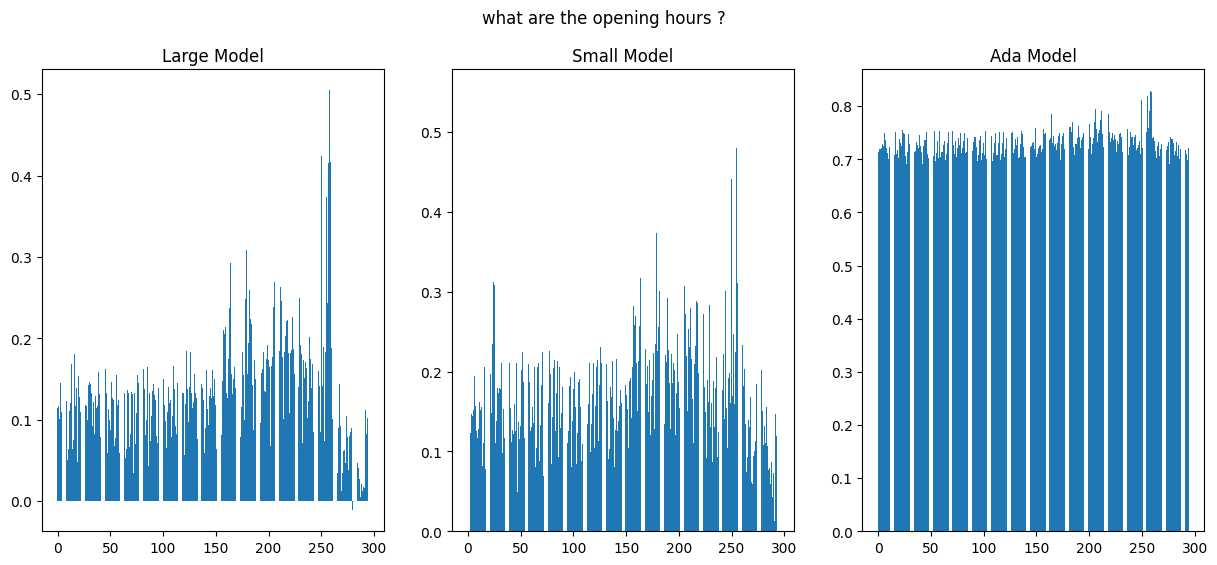

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.bar(range(len(cosine_similarities_large)), cosine_similarities_large)
plt.title('Large Model')

plt.subplot(1, 3, 2)
plt.bar(range(len(cosine_similarities_small)), cosine_similarities_small)
plt.title('Small Model')

plt.subplot(1, 3, 3)
plt.bar(range(len(cosine_similarities_ada)), cosine_similarities_ada)
plt.title('Ada Model')

plt.suptitle('what are the opening hours ?')
plt.show()